In [1]:
'''
First step to Keras

This is modified version of fchollet/deep-learning-with-python-notebooks
Original copyright: Copyright (c) 2017 François Chollet
https://github.com/fchollet/deep-learning-with-python-notebooks
'''

from keras.datasets import imdb

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    print("shape=%s" % sequences.shape)
    results = np.zeros((len(sequences), dimension), dtype='uint16')
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results


# load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# vectorize train data
x_train = vectorize_sequences(train_data)

# vectorize test data
x_test = vectorize_sequences(test_data)

# vectorize train label
y_train = np.asarray(train_labels).astype('float32')

# vectorize test label
y_test = np.asarray(test_labels).astype('float32')


Using TensorFlow backend.


shape=25000
shape=25000


In [4]:
x_train[0]

array([0, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [5]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 748us/step - loss: 0.5078 - acc: 0.7813 - val_loss: 0.3795 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 5s 329us/step - loss: 0.3004 - acc: 0.9044 - val_loss: 0.3002 - val_acc: 0.8902
Epoch 3/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.2180 - acc: 0.9278 - val_loss: 0.3082 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.1753 - acc: 0.9437 - val_loss: 0.2836 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1431 - acc: 0.9543 - val_loss: 0.2844 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1156 - acc: 0.9649 - val_loss: 0.3136 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.0987 - acc: 0.9704 - val_loss: 0.3119 -

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

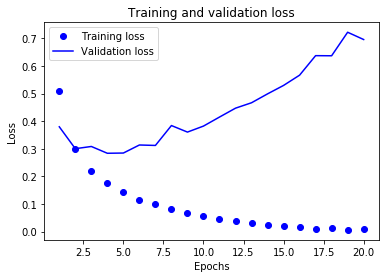

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

# 'bo' means 'blue dot'
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# 'b' means 'solid blue line'
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

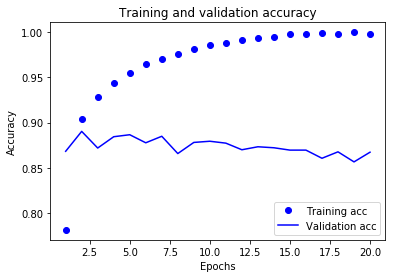

In [14]:
# clear the image
plt.clf()

accs = history_dict['acc']
val_accs = history_dict['val_acc']

plt.plot(epochs, accs, 'bo', label='Training acc')
plt.plot(epochs, val_accs, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 6s 254us/step


[0.7706323717093467, 0.84988]